# Interactive Visualizations with Bokeh

## Importing needed Libraries

In [1]:
import pandas as pd
import numpy as np
import bokeh.sampledata
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import datetime

## Import the Data

In [2]:
df = pd.read_csv('raindata.csv')

In [3]:
df.head()

,Unnamed: 0,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,0,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,...,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No,2008.0,12.0
1,1,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,...,1010.6,1007.8,8.0,7.0,17.2,24.3,No,No,2008.0,12.0
2,2,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,...,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No,2008.0,12.0
3,3,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,...,1017.6,1012.8,8.0,7.0,18.1,26.5,No,No,2008.0,12.0
4,4,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008.0,12.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140787 entries, 0 to 140786
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     140787 non-null  int64  
 1   Location       140787 non-null  object 
 2   MinTemp        140787 non-null  float64
 3   MaxTemp        140787 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    140787 non-null  float64
 6   Sunshine       140787 non-null  float64
 7   WindGustDir    140787 non-null  object 
 8   WindGustSpeed  140787 non-null  float64
 9   WindDir9am     140787 non-null  object 
 10  WindDir3pm     140787 non-null  object 
 11  WindSpeed9am   140787 non-null  float64
 12  WindSpeed3pm   140787 non-null  float64
 13  Humidity9am    140787 non-null  float64
 14  Humidity3pm    140787 non-null  float64
 15  Pressure9am    140787 non-null  float64
 16  Pressure3pm    140787 non-null  float64
 17  Cloud9am       140787 non-nul

In [5]:
print(df.shape)

(140787, 25)


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,140787.0,72973.534133,42089.082058,0.00,36230.5,73501.0,109319.5,145458.00
MinTemp,140787.0,12.188607,6.395989,-6.20,7.6,12.0,16.8,30.60
MaxTemp,140787.0,23.237980,7.092969,2.45,17.9,22.6,28.2,43.65
Rainfall,140787.0,0.485723,0.791851,0.00,0.0,0.0,0.8,2.00
Evaporation,140787.0,3.553537,3.536350,0.00,0.0,3.1,5.6,14.00
Sunshine,140787.0,4.944860,4.673046,0.00,0.0,5.0,9.4,14.50
WindGustSpeed,140787.0,38.272632,14.061123,6.00,30.0,37.0,46.0,70.00
WindSpeed9am,140787.0,13.882567,8.567498,0.00,7.0,13.0,19.0,37.00
WindSpeed3pm,140787.0,18.469773,8.495757,0.00,13.0,19.0,24.0,40.50
Humidity9am,140787.0,68.955514,18.853151,18.00,57.0,70.0,83.0,100.00


In [7]:
df.describe(include=[object]).T

,count,unique,top,freq
Location,140787,49,Canberra,3402
WindGustDir,140787,16,W,17007
WindDir9am,140787,16,N,12150
WindDir3pm,140787,16,SE,11859
RainToday,140787,2,No,109332
RainTomorrow,140787,2,No,109586


## EDA

<AxesSubplot:>

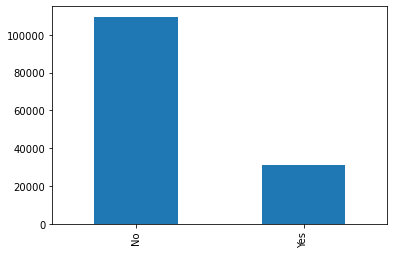

In [8]:
df['RainTomorrow'].value_counts().plot(kind='bar')

In [9]:
df.RainTomorrow = df.RainTomorrow.map({'No':0, 'Yes':1}).astype('float64')

<AxesSubplot:>

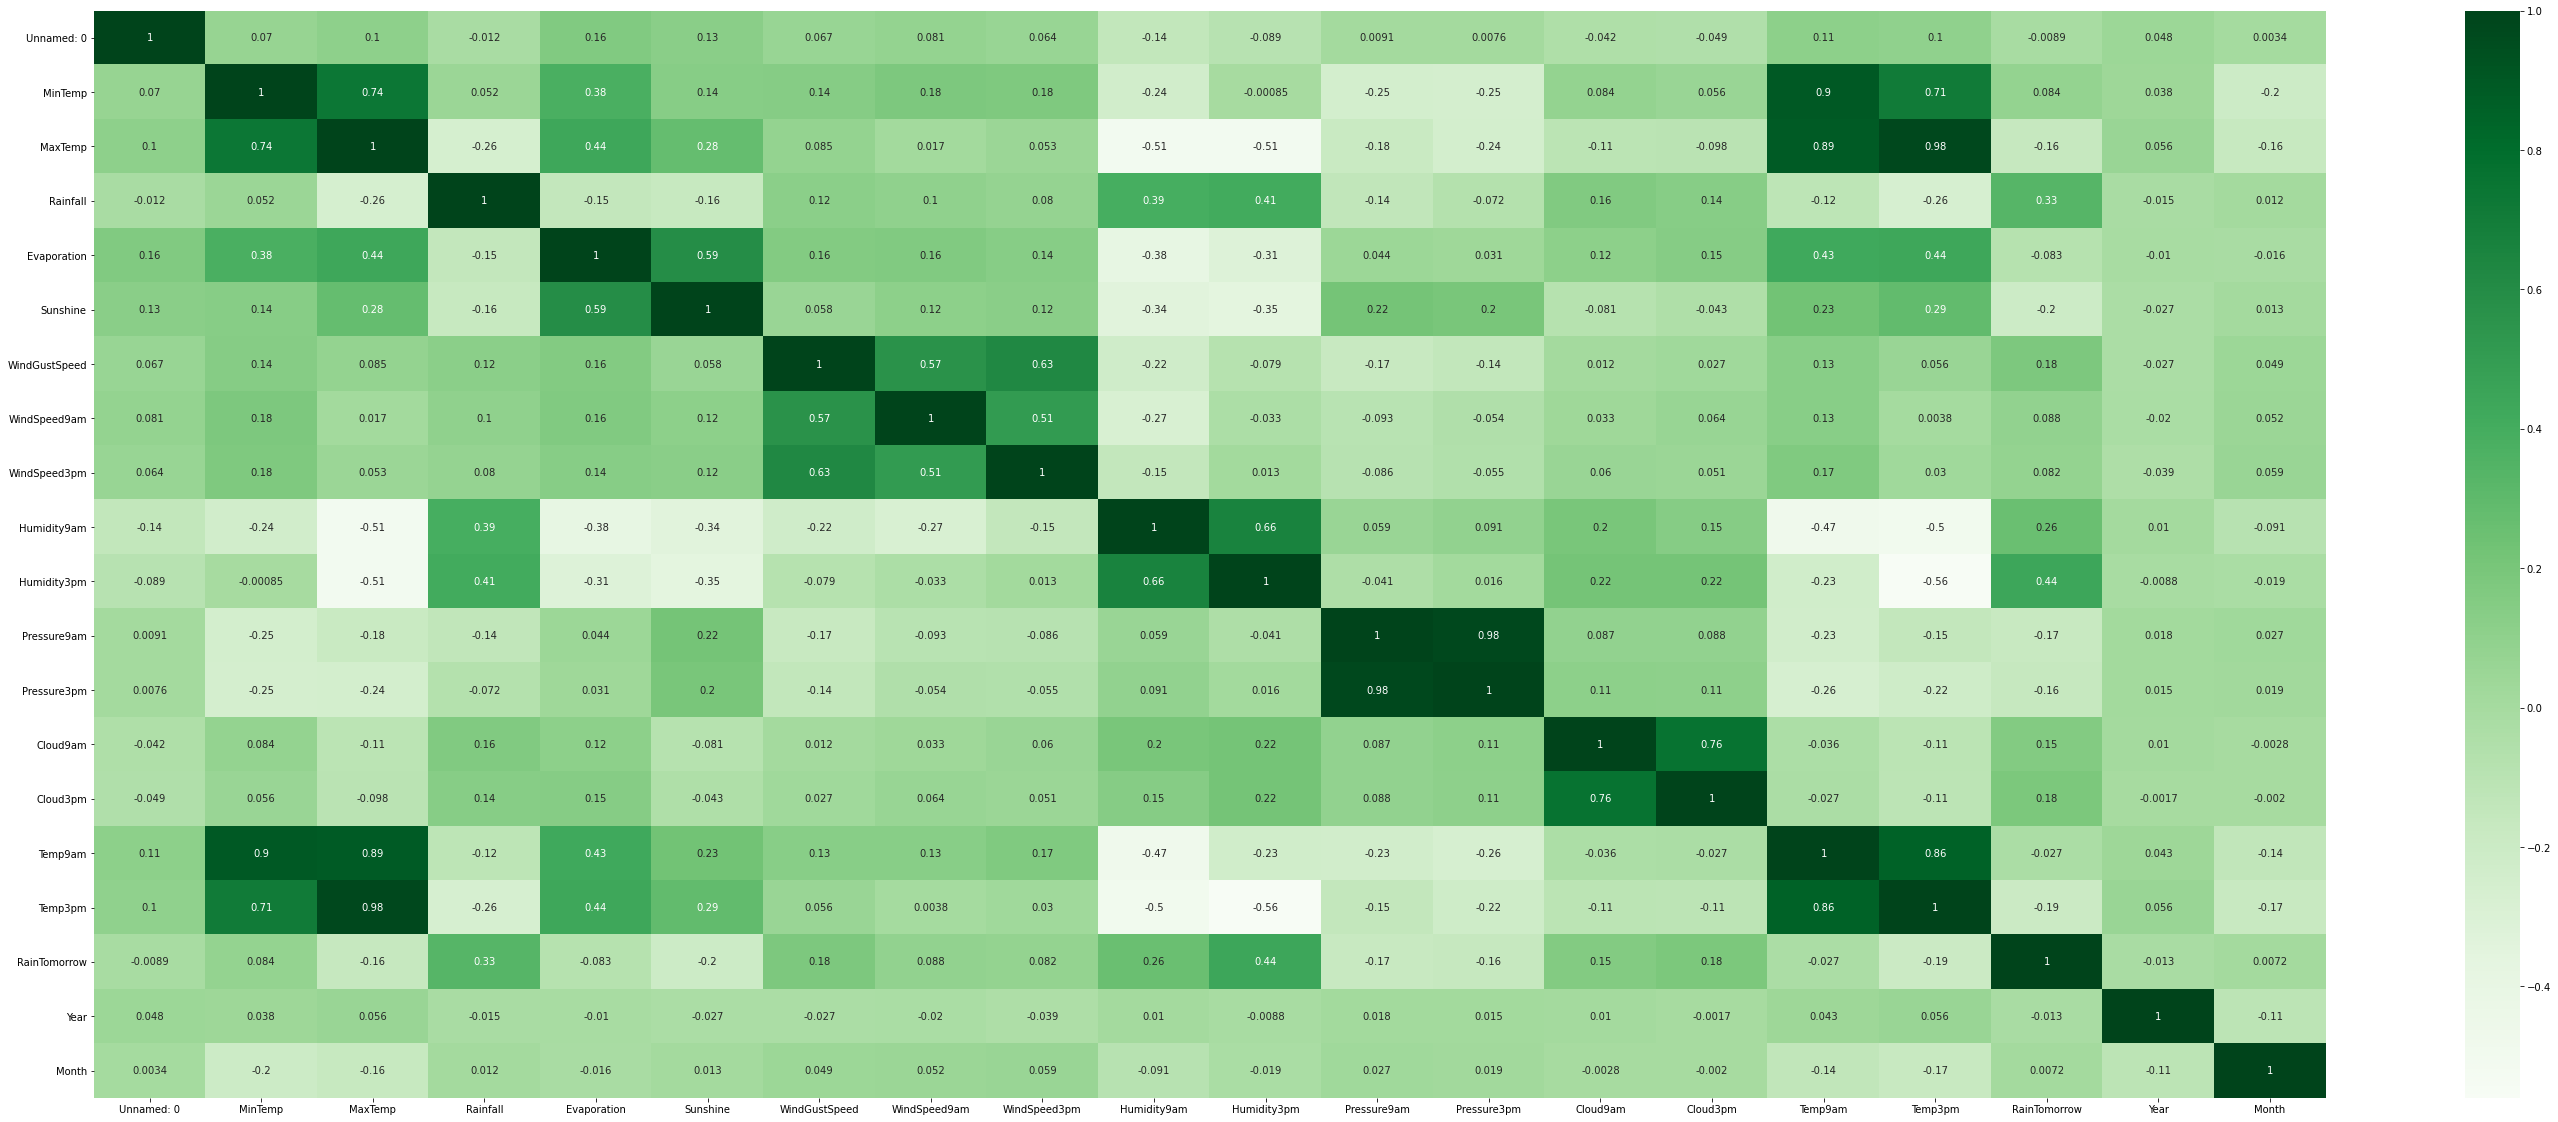

In [10]:
corr = df.corr()
corr.style.background_gradient()

plt.figure(figsize=(50,20))
sns.heatmap(corr,annot=True,cmap='Greens')

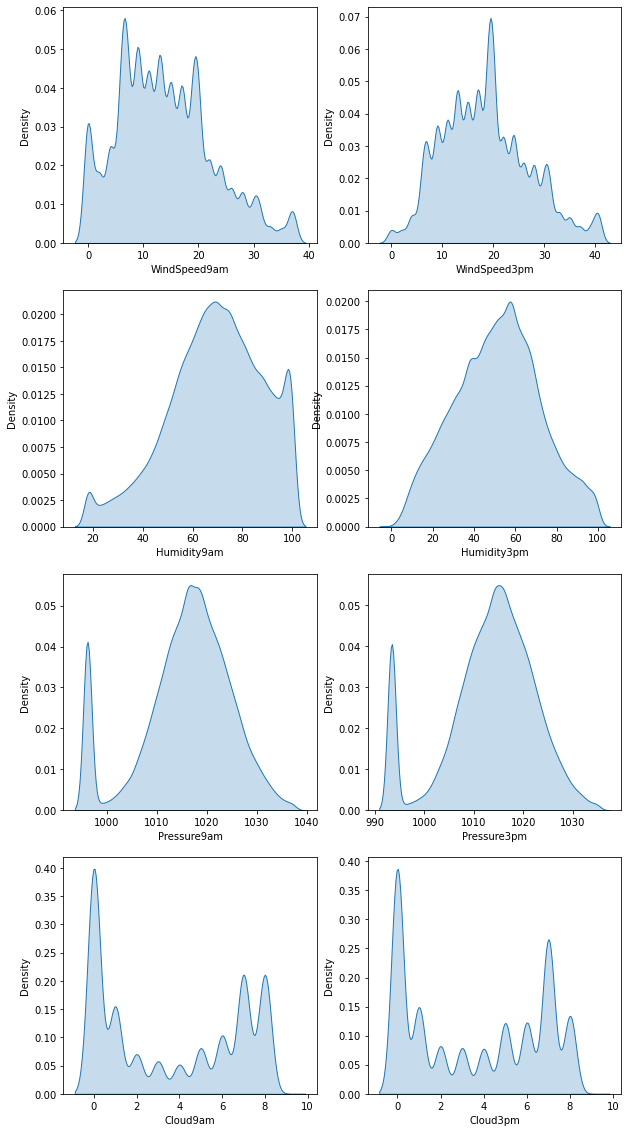

In [11]:
fig, ax = plt.subplots(4, 2, figsize = (10, 20))
sns.kdeplot(x = df.WindSpeed9am, ax = ax [0, 0], shade = True)
sns.kdeplot(x = df.WindSpeed3pm, ax = ax[0, 1], shade = True)
sns.kdeplot(x = df.Humidity9am, ax = ax[1, 0], shade = True)
sns.kdeplot(x = df.Humidity3pm, ax = ax[1, 1], shade = True)
sns.kdeplot(x = df.Pressure9am, ax = ax[2, 0], shade=True)
sns.kdeplot(x = df.Pressure3pm, ax = ax[2, 1], shade=True)
sns.kdeplot(x = df.Cloud9am, ax = ax[3, 0], shade=True)
sns.kdeplot(x = df.Cloud3pm, ax = ax[3, 1], shade=True);

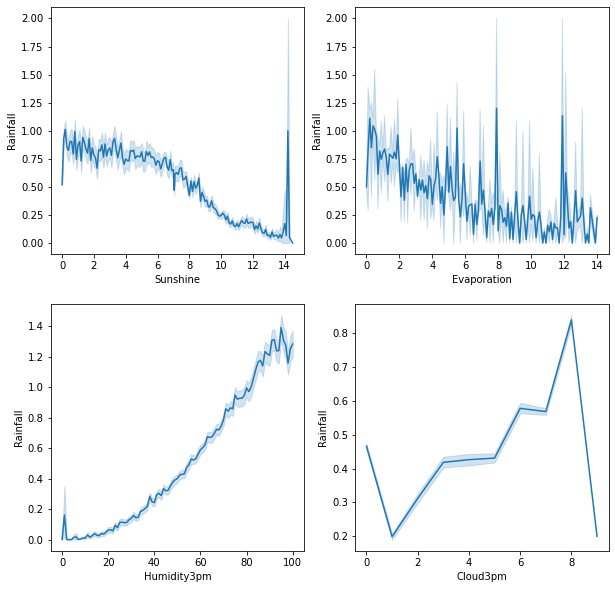

In [12]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
sns.lineplot(data = df, x = 'Sunshine', y = 'Rainfall', ax = ax [0, 0])
sns.lineplot(data = df, x = 'Evaporation', y = 'Rainfall', ax = ax [0, 1])
sns.lineplot(data = df, x = 'Humidity3pm', y = 'Rainfall', ax = ax [1, 0])
sns.lineplot(data = df, x = 'Cloud3pm', y = 'Rainfall', ax = ax [1, 1]);

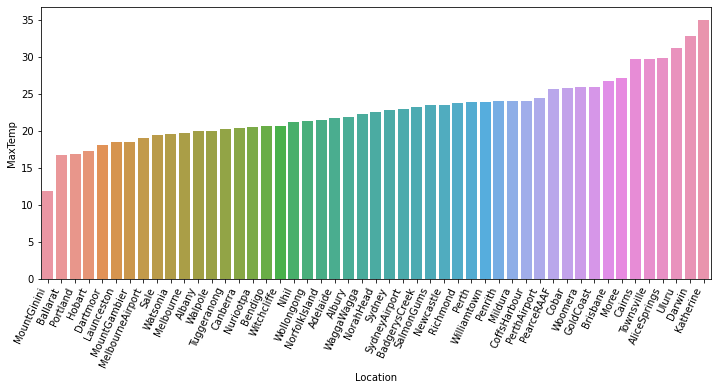

In [13]:
loc_temp = df.groupby(['Location'])['MaxTemp'].median().reset_index()
plt.figure(figsize = (12, 5))
loc = sns.barplot(data = loc_temp, y = 'MaxTemp', x = 'Location', order = loc_temp.sort_values('MaxTemp').Location)
loc.set_xticklabels(loc.get_xticklabels(), rotation = 65, horizontalalignment = 'right');

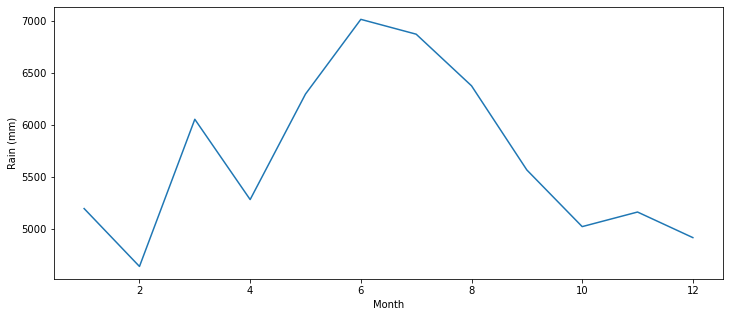

In [14]:
fig, (plot1) = plt.subplots(1, figsize = (12, 5))
monthly = df.groupby(['Month'])['Rainfall'].sum().reset_index()
plot1.plot(monthly.Month, monthly.Rainfall)
plot1.set_xlabel('Month')
plot1.set_ylabel('Rain (mm)');

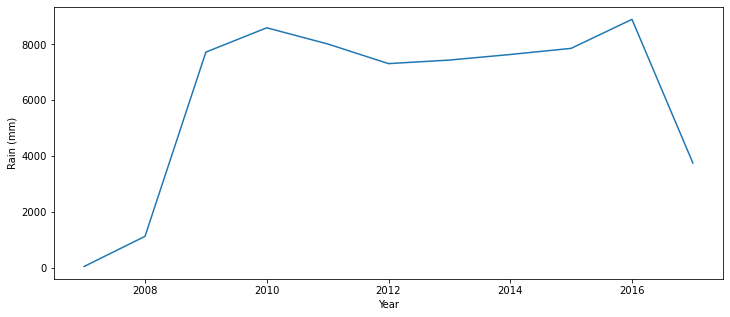

In [15]:
fig, (plot2) = plt.subplots(1, figsize = (12, 5))
yearly = df.groupby(['Year'])['Rainfall'].sum().reset_index()
plot2.plot(yearly.Year, yearly.Rainfall)
plot2.set_xlabel('Year')
plot2.set_ylabel('Rain (mm)');

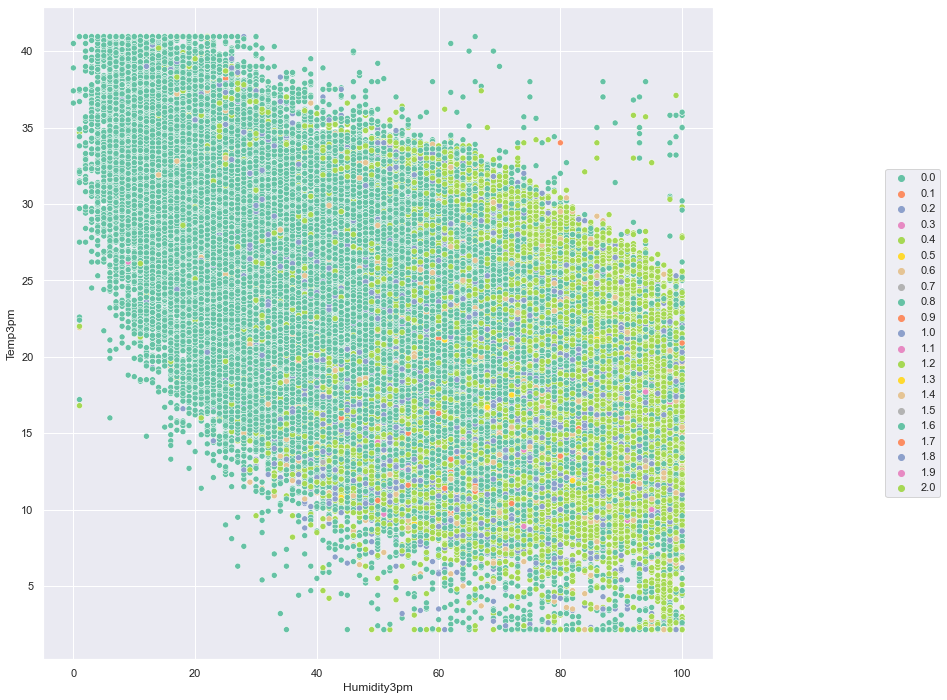

In [16]:
sns.set(rc = {'figure.figsize':(12,12)})
pop = sns.scatterplot(data = df,x = 'Humidity3pm', y = 'Temp3pm', hue = 'Rainfall', palette = 'Set2')
pop.legend(loc = 'center left', bbox_to_anchor = (1.25, 0.5), ncol = 1)